### Model training and evaluation

In [6]:
# The modules we will need


# NumPy might be useful in some cases with data manipulating 
import numpy as np


# pandas will be useful for data handling
import pandas as pd


# an option for displaying all the columns of our main dataframe
pd.options.display.max_columns = 30


# With matplotlib we will do the plotting
import matplotlib.pyplot as plt
%matplotlib inline


# with this option we control the look and feel of the plots
from matplotlib import style
style.use((['ggplot',  'fast']))


# This will be our classifier
from sklearn.ensemble import RandomForestClassifier

# This helps with automatically splitting the data into train and test parts
from sklearn.model_selection import train_test_split


# Grid search looks at many combinations of parameters of the classifier and finds the optimal combination
from sklearn.model_selection import GridSearchCV

# These are some of the standard metrics for evaluating out models
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score

# We will use this module to 'pickle' and preserve the trained model, so that we can save it for later use
import pickle


In [7]:
model1_df = pd.read_csv('output/model1_data.csv', dtype='float16', index_col='Unnamed: 0')

/home/takis/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [8]:
model1_df.head()

,LateAircraftDelay,previous_ArrDelay_percent,avg_flight_time_percent,utilisation_percent
0.0,NaN,0.038757,0.976562,1.000000
1.0,NaN,-0.043701,0.587402,0.965332
2.0,0.0,0.153809,-4.292969,1.000000
3.0,96.0,1.021484,0.679688,0.823730
4.0,63.0,0.806641,1.081055,1.000000


In [9]:
model1_df['LateAircraftDelay'] = model1_df['LateAircraftDelay'].apply(lambda x: True if x > 0 else False)

In [10]:
model1_df.replace([np.inf, -np.inf], 0, inplace=True)

In [11]:
model1_df.dropna(inplace=True)
model1_df.reset_index(inplace=True)

In [12]:
model1_df.head()

,index,LateAircraftDelay,previous_ArrDelay_percent,avg_flight_time_percent,utilisation_percent
0,0.0,False,0.038757,0.976562,1.000000
1,1.0,False,-0.043701,0.587402,0.965332
2,2.0,False,0.153809,-4.292969,1.000000
3,3.0,True,1.021484,0.679688,0.823730
4,4.0,True,0.806641,1.081055,1.000000


In [13]:
X = model1_df[['previous_ArrDelay_percent', 'avg_flight_time_percent', 'utilisation_percent']]

In [14]:
y = model1_df[['LateAircraftDelay']]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [16]:
## random True column with the same proportion as the target feature
class_proportion = y_test.mean()[0]

y_test['random'] = y_test.apply( lambda x : 1 if np.random.random() < class_proportion else 0 , axis=1)

/home/takis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [17]:
y_test.head()

,LateAircraftDelay,random
966124,False,0
1644127,False,0
4718586,False,0
3052897,False,0
6463123,False,0


In [ ]:
### Do not try this at home, as it will take too looong.
### Uncomment to use
'''
classifier = RandomForestClassifier()

parameters = { 'n_estimators' : [100]
              , 'criterion' : ('gini', 'entropy')
              , 'max_depth' : [3,6,9] 
              , 'min_samples_leaf' : [100, 500, 1000]
              , 'bootstrap' : [True]
              , 'oob_score' : [True]
              , 'class_weight' : ['balanced']
             }

grid = GridSearchCV(classifier, parameters)

grid.fit(X_train, y_train)

print(grid.best_estimator_)
'''

In [18]:
## saving the grid search for later inspection
grid_filepath = 'output/grid_search.p'

In [19]:
#pickle.dump(grid, open(grid_filepath, 'wb'))

In [20]:
## let us load the grid, so one does not have to do the computation again
grid = pickle.load( open( grid_filepath, 'rb' ) )

In [34]:
## Let us use the best parameters to train our model
best_classifier = grid.best_estimator_
print (grid.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True,
            random_state=None, verbose=0, warm_start=False)


In [17]:
## classifying with the best parameters
## consider loading trained model instead of training it again
best_classifier.fit(X_train, y_train)

/home/takis/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=3, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=100,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=None, oob_score=True,
            random_state=None, verbose=0, warm_start=False)

In [21]:
## saving the trained model for later use
model_filepath = 'output/model1.p'

In [22]:
#pickle.dump(best_classifier, open(model_filepath, 'wb'))

In [23]:
## let us load the model, so one does not have to do the computation again
best_classifier = pickle.load( open( model_filepath, 'rb' ) )

In [24]:
## using our trained model to make predictions
y_pred = best_classifier.predict(X_test)

No handles with labels found to put in legend.


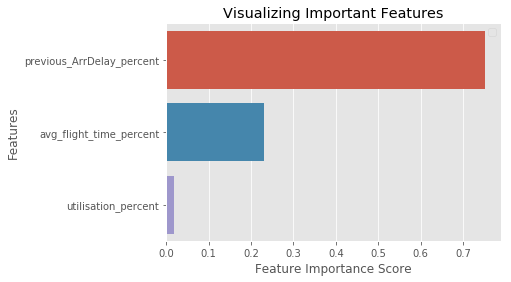

In [26]:
## The importance of the features

feature_imp = pd.Series(best_classifier.feature_importances_,index=X.columns)
feature_imp
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

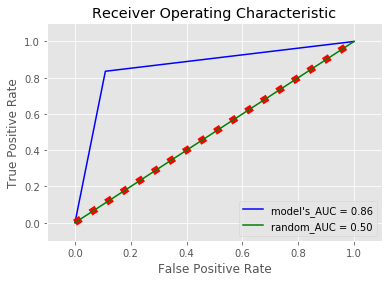

In [27]:
### model1 ROC

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test['LateAircraftDelay'], y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b', label="model's_AUC = %0.2f"% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r:', linewidth=7)
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')



### random guess ROC

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test['random'], y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'green', label='random_AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')


plt.show()

In [28]:
## classification report for model1
print (classification_report(y_test['LateAircraftDelay'], y_pred) )

              precision    recall  f1-score   support

       False       0.98      0.89      0.93   1992016
        True       0.46      0.84      0.59    222638

   micro avg       0.89      0.89      0.89   2214654
   macro avg       0.72      0.86      0.76   2214654
weighted avg       0.93      0.89      0.90   2214654



In [29]:
## for comparison we compute a classification report for a random guess
print (classification_report(y_test['random'], y_pred) )

              precision    recall  f1-score   support

           0       0.90      0.82      0.86   1992131
           1       0.10      0.18      0.13    222523

   micro avg       0.75      0.75      0.75   2214654
   macro avg       0.50      0.50      0.49   2214654
weighted avg       0.82      0.75      0.78   2214654



In [30]:
## the confusion matrix for the model ...
print (confusion_matrix(y_test['LateAircraftDelay'], y_pred) )

[[1774962  217054]
 [  36596  186042]]


In [31]:
## ... and the confusion matrix for the random guess
print (confusion_matrix(y_test['random'], y_pred) )

[[1629477  362654]
 [ 182081   40442]]
